In [365]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [366]:
df1 = pd.read_csv(r'C:\Users\User\Downloads\MRKS_240722_241121.csv', sep = ';')
df2 = pd.read_csv(r'C:\Users\User\Downloads\MRKS_241122_250221.csv', sep = ';')
TATN = pd.concat([df1,df2], ignore_index = True)
TATN = TATN.drop(columns = ['<HIGH>','<LOW>'])
TATN = TATN.rename(columns = {'<DATE>':'DATA','<TIME>':'TIME','<OPEN>':'OPEN','<CLOSE>':'CLOSE','<VOL>':'VOL',})
TATN.tail(30)

,<TICKER>,<PER>,DATA,TIME,OPEN,CLOSE,VOL
1334,MRKS,60,18/02/25,16:00,0.5910,0.5910,1107000
1335,MRKS,60,18/02/25,17:00,0.5910,0.5905,644000
1336,MRKS,60,18/02/25,18:00,0.5905,0.5910,220000
1337,MRKS,60,19/02/25,10:00,0.5930,0.5935,2116000
1338,MRKS,60,19/02/25,11:00,0.5940,0.5940,1203000
1339,MRKS,60,19/02/25,12:00,0.5940,0.5955,204000
1340,MRKS,60,19/02/25,13:00,0.5950,0.5950,416000
1341,MRKS,60,19/02/25,14:00,0.5950,0.5960,727000
1342,MRKS,60,19/02/25,15:00,0.5960,0.5960,523000
1343,MRKS,60,19/02/25,16:00,0.5960,0.5950,493000


In [367]:
TATN_open_history = TATN.query("TIME == '10:00'")
TATN_close_history = TATN.query("TIME == '18:00'")
TATN_open_history = TATN_open_history.drop(columns = ['TIME', 'VOL', 'CLOSE'])
TATN_close_history = TATN_close_history.drop(columns = ['TIME', 'VOL', 'OPEN'])
TATN_close_history

,<TICKER>,<PER>,DATA,CLOSE
8,MRKS,60,22/07/24,0.6010
17,MRKS,60,23/07/24,0.5975
26,MRKS,60,24/07/24,0.6080
35,MRKS,60,25/07/24,0.6000
44,MRKS,60,26/07/24,0.5975
...,...,...,...,...
1327,MRKS,60,17/02/25,0.6000
1336,MRKS,60,18/02/25,0.5910
1345,MRKS,60,19/02/25,0.5950
1354,MRKS,60,20/02/25,0.6100


In [368]:
TATN = pd.merge(TATN, TATN_open_history, on = 'DATA', how = 'inner')
TATN = pd.merge(TATN, TATN_close_history, on = 'DATA', how = 'inner')
TATN

,<TICKER>_x,<PER>_x,DATA,TIME,OPEN_x,CLOSE_x,VOL,<TICKER>_y,<PER>_y,OPEN_y,<TICKER>,<PER>,CLOSE_y
0,MRKS,60,22/07/24,10:00,0.5995,0.6015,4040000,MRKS,60,0.5995,MRKS,60,0.6010
1,MRKS,60,22/07/24,11:00,0.5985,0.6015,1350000,MRKS,60,0.5995,MRKS,60,0.6010
2,MRKS,60,22/07/24,12:00,0.6020,0.6000,720000,MRKS,60,0.5995,MRKS,60,0.6010
3,MRKS,60,22/07/24,13:00,0.6000,0.5960,730000,MRKS,60,0.5995,MRKS,60,0.6010
4,MRKS,60,22/07/24,14:00,0.5975,0.6020,490000,MRKS,60,0.5995,MRKS,60,0.6010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,MRKS,60,21/02/25,14:00,0.6110,0.6085,2578000,MRKS,60,0.6185,MRKS,60,0.5975
1346,MRKS,60,21/02/25,15:00,0.6085,0.6080,443000,MRKS,60,0.6185,MRKS,60,0.5975
1347,MRKS,60,21/02/25,16:00,0.6080,0.6095,649000,MRKS,60,0.6185,MRKS,60,0.5975
1348,MRKS,60,21/02/25,17:00,0.6085,0.6095,440000,MRKS,60,0.6185,MRKS,60,0.5975


In [371]:
TATN['VOL*CLOSE / OPEN_y'] = TATN['VOL'] * TATN['CLOSE_x'] / TATN['OPEN_y']
TATN['Res_without_weight'] = TATN['CLOSE_y'] / TATN['OPEN_y']
TATN_res = TATN.groupby(['DATA'], sort = False).agg({'VOL':'sum', 'VOL*CLOSE / OPEN_y':'sum', 'Res_without_weight':'mean'}).reset_index() # проблема здесь
TATN_res['RESULT'] = TATN_res['VOL*CLOSE / OPEN_y'] / TATN_res['VOL']
RESULT = TATN_res['RESULT'].to_list()
Res_without_weight_list = TATN_res['Res_without_weight'].to_list() 
Res_without_weight_list_mult = Res_without_weight_list[0:1]
RESULT_mult = RESULT[0:1]
for i in range (1,150):
   b = i-1
   a = RESULT[i] * RESULT_mult[b]
   RESULT_mult.append(a)
   e = Res_without_weight_list[i] * Res_without_weight_list_mult[b]
   Res_without_weight_list_mult.append(e)
TATN_res['RESULT_total'] = RESULT_mult
TATN_res['RESULT_without_weight'] = Res_without_weight_list_mult
#TATN_res.tail(40)
TATN_res['diff'] = TATN_res['RESULT_without_weight'] - TATN_res['RESULT_total']
TATN_res.tail(40)

,DATA,VOL,VOL*CLOSE / OPEN_y,Res_without_weight,RESULT,RESULT_total,RESULT_without_weight,diff
110,25/12/24,93494000,1.008774e+08,1.071429,1.078972,0.935048,0.664214,-0.270834
111,26/12/24,21031000,2.084359e+07,0.981333,0.991089,0.926716,0.651816,-0.274900
112,27/12/24,6340000,6.267273e+06,0.986486,0.988529,0.916086,0.643008,-0.273078
113,28/12/24,13106000,1.328208e+07,1.021005,1.013435,0.928394,0.656514,-0.271880
114,30/12/24,28640000,2.877079e+07,0.997364,1.004567,0.932633,0.654783,-0.277851
115,03/01/25,11648000,1.136146e+07,0.971954,0.975400,0.909691,0.636419,-0.273272
116,06/01/25,12914000,1.291424e+07,0.991870,1.000018,0.909708,0.631245,-0.278463
117,08/01/25,152533000,1.596259e+08,1.053619,1.046501,0.952010,0.665092,-0.286918
118,09/01/25,125736000,1.272343e+08,0.991590,1.011916,0.963354,0.659498,-0.303856
119,10/01/25,63661000,6.399611e+07,0.982264,1.005264,0.968425,0.647801,-0.320624


<Axes: xlabel='DATA', ylabel='RESULT_without_weight'>

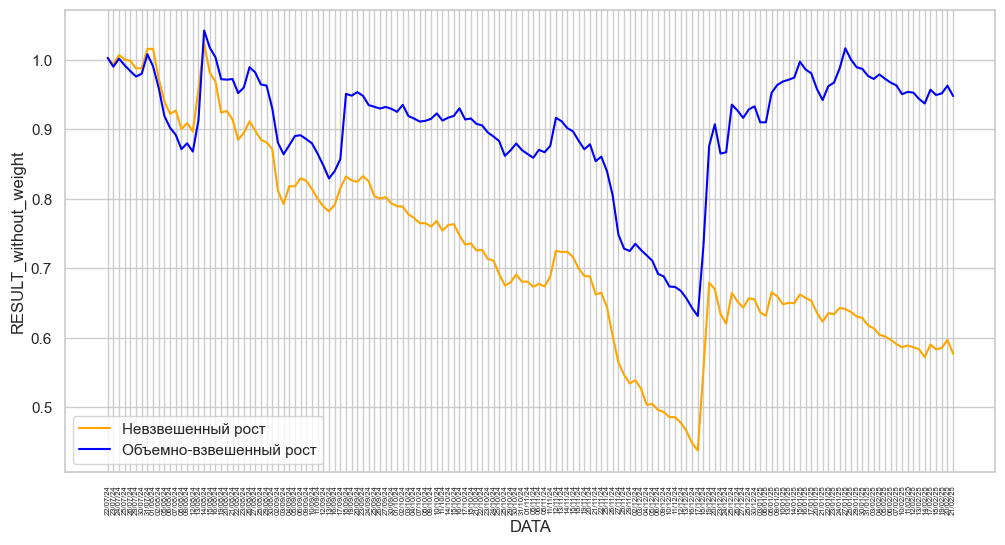

In [372]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.xticks(rotation = 90, fontsize=5.5, color = 'k')
sns.lineplot(data=TATN_res, x='DATA', y='RESULT_without_weight', label='Невзвешенный рост', color='orange')
sns.lineplot(data=TATN_res, x='DATA', y='RESULT_total', label='Объемно-взвешенный рост', color='blue')
#sns.lineplot(data=TATN_res, x='DATA', y='diff', label='Незвзешенный рост', color='orange')
#sns.lineplot(data=TATN_res, x='DATA', y='RESULT_total', label='Объемно-взвешенный рост', color='blue')

<Axes: xlabel='DATA', ylabel='diff'>

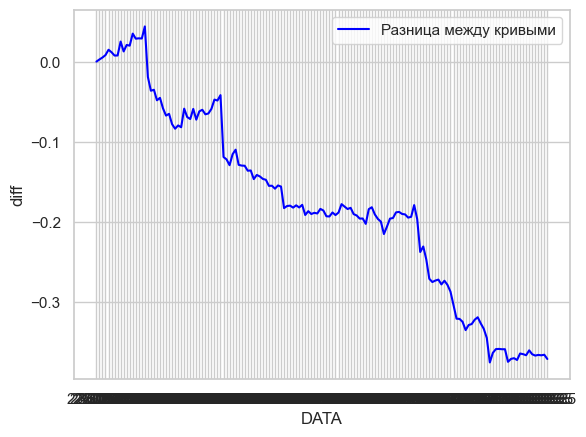

In [373]:
sns.lineplot(data=TATN_res, x='DATA', y='diff', label='Разница между кривыми', color='blue')

<Axes: xlabel='DATA', ylabel='CLOSE'>

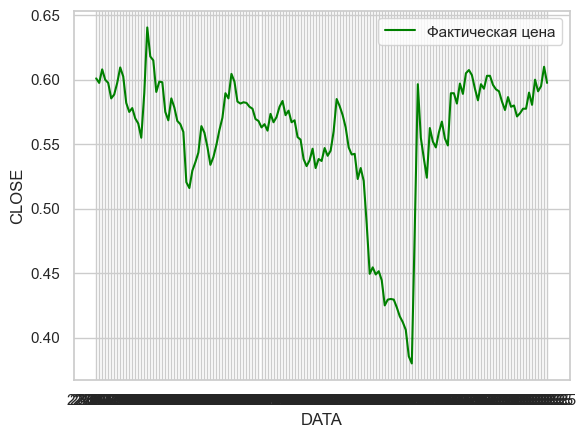

In [374]:
sns.lineplot(data=TATN_close_history, x='DATA', y='CLOSE', label='Фактическая цена', color='green')